Welcome to weather scape , A weather analysis tool for the city of Ahmedadbad

Enter 1 to view current weather
Enter 2 to view current week's stats
Enter 3 to view stats of Jan 2025
Enter 4 to view stats of 2024
Enter 5 to exit


Enter your choice -  4



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Enter 1 to view stats of a particular month
Enter 2 to compare data month-wise
Enter 3 to return to main menu


Enter choice -  1



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Enter the month number (1-12)  2



The maximum recorded temperature was - 37.0 °C

The minimum recorded temperature was - 12.0 °C

________________________________________________________________



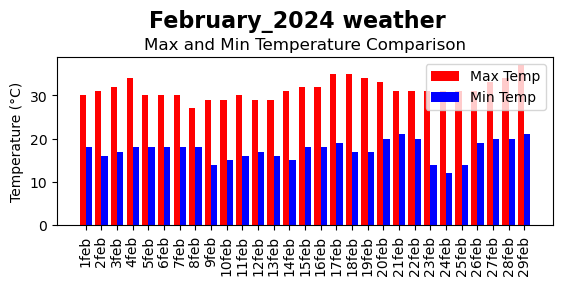

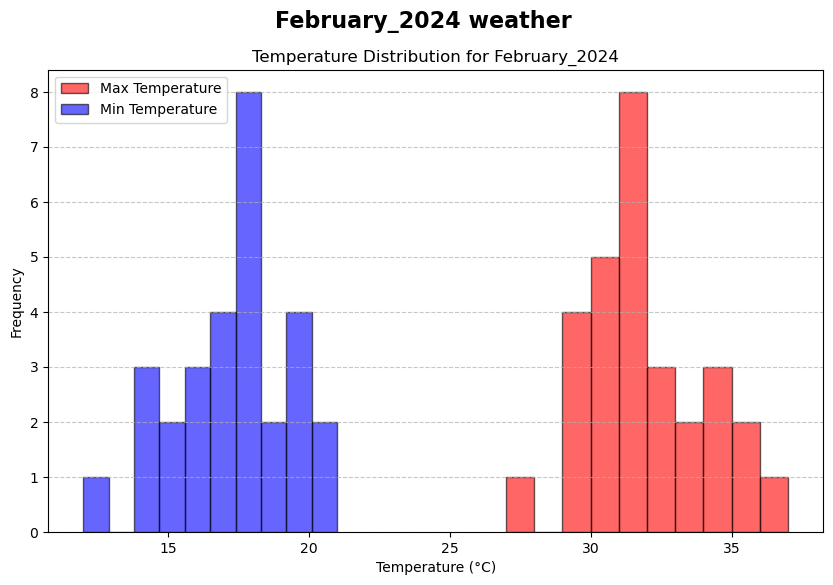

Enter 1 to view stats of a particular month
Enter 2 to compare data month-wise
Enter 3 to return to main menu


Enter choice -  2



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

The maximum recorded temperature was - 42.8387 °C

The minimum recorded temperature was - 14.2581 °C

________________________________________________________________



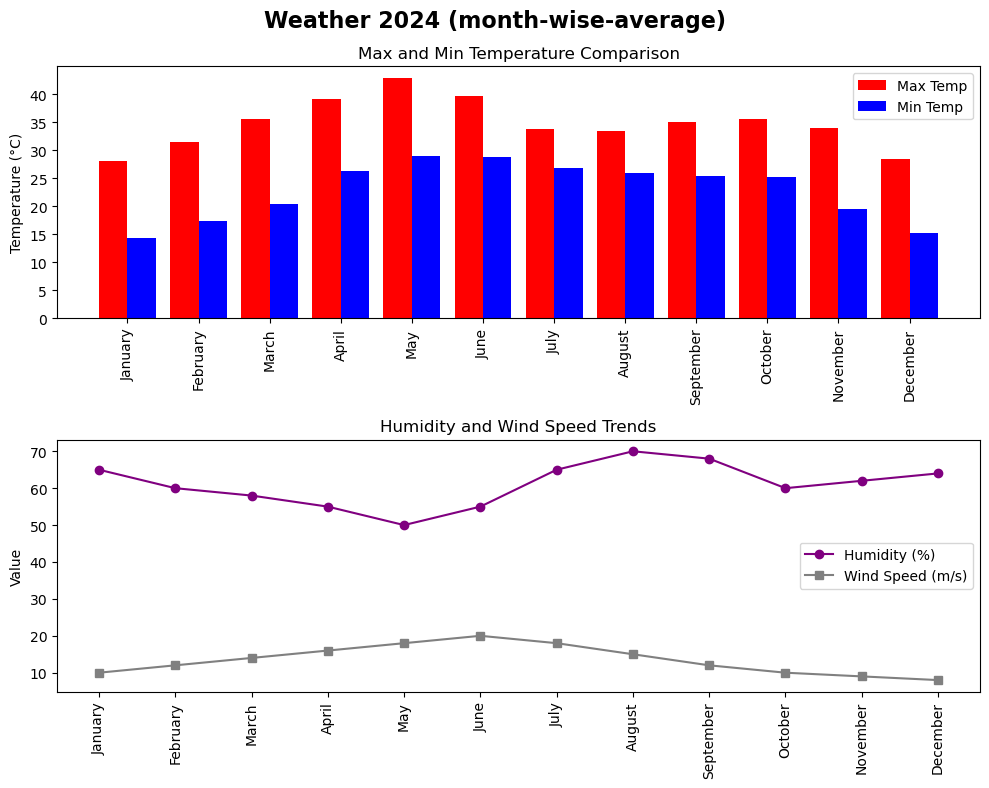

Enter 1 to view current weather
Enter 2 to view current week's stats
Enter 3 to view stats of Jan 2025
Enter 4 to view stats of 2024
Enter 5 to exit
Please enter a number
Enter 1 to view current weather
Enter 2 to view current week's stats
Enter 3 to view stats of Jan 2025
Enter 4 to view stats of 2024
Enter 5 to exit


Enter your choice -  5



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

          ***    Thank you for using WeatherScape    ***


In [2]:
import requests as rqst
import numpy as np
import mysql.connector as sql
import matplotlib.pyplot as plt
import pandas as pd

def main():
    print("Welcome to weather scape , A weather analysis tool for the city of Ahmedadbad")
    print()
    weather=Weather()
    while True:
        print("Enter 1 to view current weather")
        print("Enter 2 to view current week's stats")
        print("Enter 3 to view stats of Jan 2025")
        print("Enter 4 to view stats of 2024")
        print("Enter 5 to exit")
        try:
            choice=int(input("Enter your choice - "))
        except:
            print("Please enter a number")
            continue
            print()
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print()
        print()
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print()
        match choice:
            case 1:
                weather.get_current_weather()
                continue
            case 2:
                weather.get_current_week()
                continue
            case 3:
                weather.get_january_2025()
                continue
            case 4:
                weather.get_weather_2024()
            case 5:
                print("          ***    Thank you for using WeatherScape    ***")
                break
            case _:
                print("Invalid choice")
                continue
                
class Weather:
    def __init__(self):
        self.api_key="eefe25b852268839724d3dd0b785b7a3"
        self.api_url = "https://api.openweathermap.org/data/2.5/weather"

    def get_current_weather(self):
        dict={"q":"ahmedabad","appid":self.api_key,"units":"metric"}
        response=rqst.get(self.api_url,params=dict)
        data=response.json()
        if response.status_code == 200:
            current=pd.DataFrame([{"city": data["name"],"temperature": data["main"]["temp"],"humidity": data["main"]["humidity"],"wind_speed": data["wind"]["speed"],"pressure": data["main"]["pressure"]}])
            print(current.to_string(index=False))
            print()
        else:
            print("Error fetching data for Ahmedabad")
            print()
    
    def get_current_week(self):
        try:
            conn = sql.connect(host="localhost", user="root", passwd="",database="weatherscape")
        except sql.Error as e:
            print(f"Database connection failed: {e}")
        cur=conn.cursor()
        query="SELECT * FROM weekly_data"
        cur.execute(query)
        columns=[col[0] for col in cur.description]
        rows=cur.fetchall()
        cur.close()
        conn.close()
        weekly=pd.DataFrame(rows,columns=columns)
        max_temp=np.array(weekly["max_temp"])
        min_temp=np.array(weekly["min_temp"])
        humidity=np.array(weekly["humidity"])
        wind_speed=np.array(weekly["wind_speed"])
        weekly["date"] = pd.to_datetime(weekly["date"])
        weekly["date"] = weekly["date"].dt.day.astype(str) + " Feb" 
        dates=np.array(weekly["date"])
        
        print("The maximum recorded temperature was -",max(max_temp),"°C")
        print()
        print("The minimum recorded temperature was -",min(min_temp),"°C")
        print()
        print("________________________________________________________________")
        print()
        plt.figure(figsize=(10,10))
        plt.subplot(2, 1, 1)
        bar_width = 0.4
        x = np.arange(len(dates))
        
        plt.bar(x - bar_width/2, max_temp, width=bar_width, label="Max Temp", color="red")
        plt.bar(x + bar_width/2, min_temp, width=bar_width, label="Min Temp", color="blue")
        plt.xticks(x, dates, rotation=90)
        plt.ylabel("Temperature (°C)")
        plt.title("Max and Min Temperature Comparison")
        plt.legend(loc="upper right")
        
        plt.subplot(2, 1, 2)
        plt.plot(dates, humidity, marker="o", linestyle="-", color="purple", label="Humidity (%)")
        plt.plot(dates, wind_speed, marker="s", linestyle="-", color="grey", label="Wind Speed (m/s)")
        plt.xticks(rotation=90)
        plt.ylabel("Value")
        plt.title("Humidity and Wind Speed Trends")
        plt.legend()

        plt.suptitle("Current Week", fontsize=16, fontweight="bold")
        plt.tight_layout()
        plt.show()
        
    def get_january_2025(self):
        try:
            conn = sql.connect(host="localhost", user="root", passwd="",database="weatherscape")
        except sql.Error as e:
            print(f"Database connection failed: {e}")
        cur=conn.cursor()
        query="SELECT * FROM january_2025"
        cur.execute(query)
        columns=[col[0] for col in cur.description]
        rows=cur.fetchall()
        cur.close()
        conn.close()
        weekly=pd.DataFrame(rows,columns=columns)
        max_temp=np.array(weekly["max_temp"])
        min_temp=np.array(weekly["min_temp"])
        humidity=np.array(weekly["humidity"])
        wind_speed=np.array(weekly["wind_speed"])
        weekly["date"] = pd.to_datetime(weekly["date"])
        weekly["date"] = weekly["date"].dt.day.astype(str) + " Jan" 
        dates=np.array(weekly["date"])
        
        print("The maximum recorded temperature was -",max(max_temp),"°C")
        print()
        print("The minimum recorded temperature was -",min(min_temp),"°C")
        print()
        print("________________________________________________________________")
        print()
        plt.figure(figsize=(10,10))
        plt.subplot(2, 1, 1)
        bar_width = 0.4
        x = np.arange(len(dates))
        
        plt.bar(x - bar_width/2, max_temp, width=bar_width, label="Max Temp", color="red")
        plt.bar(x + bar_width/2, min_temp, width=bar_width, label="Min Temp", color="blue")
        plt.xticks(x, dates, rotation=90)
        plt.ylabel("Temperature (°C)")
        plt.title("Max and Min Temperature Comparison")
        plt.legend(loc="upper right")
        
        plt.subplot(2, 1, 2)
        plt.plot(dates, humidity, marker="o", linestyle="-", color="purple", label="Humidity (%)")
        plt.plot(dates, wind_speed, marker="s", linestyle="-", color="grey", label="Wind Speed (m/s)")
        plt.xticks(rotation=90)
        plt.ylabel("Value")
        plt.title("Humidity and Wind Speed Trends")
        plt.legend()

        plt.suptitle("January 2025", fontsize=16, fontweight="bold")
        plt.tight_layout()
        plt.show()


    def get_weather_2024(self):
        while True:
            print("Enter 1 to view stats of a particular month")
            print("Enter 2 to compare data month-wise")
            print("Enter 3 to return to main menu")
            try:
                choice=int(input("Enter choice - "))
            except:
                print("Please enter a number")
                self.get_weather_2024()
                print()
                print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
                print()
            print()
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print()
            match choice:
                case 1:
                    self.get_month_2024()
                case 2:
                    self.get_yearly_2024()
                    return
                case 3:
                    return 
                case _:
                    print("Please choose a valid option")
                    print()
                    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
                    print()

            
    def get_month_2024(self):
        months={1:"january_2024",2:"february_2024",3:"march_2024",4:"april_2024",5:"may_2024",6:"june_2024",7:"july_2024",8:"august_2024",9:"september_2024",10:"october_2024",11:"november_2024",12:"december_2024"}
        print()
        while True:
            try:
                month_number=int(input("Enter the month number (1-12) "))
                print()
                if month_number>13 or month_number<0:
                    raise ValueError("")
                break
            except:
                print()
                print("lease enter a valid month between 1-12")
                print()
        month_name=months[month_number]
        try:
            conn = sql.connect(host="localhost", user="root", passwd="",database="weatherscape")
        except sql.Error as e:
            print(f"Database connection failed: {e}")
        query=f"SELECT * FROM {month_name}"
        cur=conn.cursor()
        cur.execute(query)
        columns=[col[0] for col in cur.description]
        rows=cur.fetchall()
        cur.close()
        conn.close()
        monthly=pd.DataFrame(rows,columns=columns)
        max_temp=np.array(monthly["max_temp"])
        min_temp=np.array(monthly["min_temp"])
        monthly["date"] = monthly["id"].astype(str) +" "+ month_name[:3].capitalize()
        dates=np.array(monthly["date"])

        print("The maximum recorded temperature was -",max(max_temp),"°C")
        print()
        print("The minimum recorded temperature was -",min(min_temp),"°C")
        print()
        print("________________________________________________________________")
        print()
        plt.subplot(2, 1, 1)
        bar_width = 0.4
        x = np.arange(len(dates))
        
        plt.bar(x - bar_width/2, max_temp, width=bar_width, label="Max Temp", color="red")
        plt.bar(x + bar_width/2, min_temp, width=bar_width, label="Min Temp", color="blue")
        plt.xticks(x, dates, rotation=90)
        plt.ylabel("Temperature (°C)")
        plt.title("Max and Min Temperature Comparison")
        plt.suptitle(f"{month_name} Weather".capitalize(), fontsize=16, fontweight="bold")
        plt.legend()
        plt.figure(figsize=(10, 6))
        plt.hist(max_temp, bins=10, alpha=0.6, label="Max Temperature", color="red", edgecolor="black")
        plt.hist(min_temp, bins=10, alpha=0.6, label="Min Temperature", color="blue", edgecolor="black")
    
        plt.xlabel("Temperature (°C)")
        plt.ylabel("Frequency")
        plt.title(f"Temperature Distribution for {month_name.capitalize()}")
        plt.legend()
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        plt.suptitle(f"{month_name} Weather".capitalize() , fontsize=16, fontweight="bold")
        plt.show()

    def get_yearly_2024(self):
        try:
            conn = sql.connect(host="localhost", user="root", passwd="",database="weatherscape")
        except sql.Error as e:
            print(f"Database connection failed: {e}")
        cur=conn.cursor()
        query="SELECT * FROM weather_2024"
        cur.execute(query)
        columns=[col[0] for col in cur.description]
        rows=cur.fetchall()
        cur.close()
        conn.close()
        yearly=pd.DataFrame(rows,columns=columns)
        max_temp=np.array(yearly["avg_max_temp"])
        min_temp=np.array(yearly["avg_min_temp"])
        humidity=np.array(yearly["avg_humidity"])
        wind_speed=np.array(yearly["avg_wind_speed"])
        months=np.array(yearly["month"])
        print("The maximum recorded temperature was -",max(max_temp),"°C")
        print()
        print("The minimum recorded temperature was -",min(min_temp),"°C")
        print()
        print("________________________________________________________________")
        print()
        plt.figure(figsize=(10,8))
        plt.subplot(2, 1, 1)
        bar_width = 0.4
        x = np.arange(len(months))
        
        plt.bar(x - bar_width/2, max_temp, width=bar_width, label="Max Temp", color="red")
        plt.bar(x + bar_width/2, min_temp, width=bar_width, label="Min Temp", color="blue")
        plt.xticks(x, months, rotation=90)
        plt.ylabel("Temperature (°C)")
        plt.title("Max and Min Temperature Comparison")
        plt.legend(loc="upper right")
        
        plt.subplot(2, 1, 2)
        plt.plot(months, humidity, marker="o", linestyle="-", color="purple", label="Humidity (%)")
        plt.plot(months, wind_speed, marker="s", linestyle="-", color="grey", label="Wind Speed (m/s)")
        plt.xticks(rotation=90)
        plt.ylabel("Value")
        plt.title("Humidity and Wind Speed Trends")
        plt.legend()

        plt.suptitle("Weather 2024 (month-wise-average)", fontsize=16, fontweight="bold")
        plt.tight_layout()
        plt.show()
        
main()